# high level tasks information for this project.

1. Frame the problem
 - Build a model of housing prices in California using California census data.
 - Data has metrices such as population, median income, median housing price etc.
2. Get the data
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune model.
7. Present solution
8. Launch , monitor and maintain system.

##**Select a Performance Measure**

For regression problem use Root Mean Square Error (RMSE). It measures the standard deviation of the error the system makes in its predictions. e.g. an RMSE equals to 50000 means that about 68% of the system's predictions fall within  50000 of actual value, and about 95% of the predictions fall within $100000 of the actual value.

RMSE(**X**,h)=SQRT((1/m) SUM((h(xi)-yi))^2)

the Standard deviation generally denoted sigma, is the square root of the variance, which is the average of the squared deviation from the mean.

m= number of instances in the dataset measuring the RMSE on.
 - when evaluting the RMSE on a validation set of 2000 districts ,then m=2000.
xi= is the vector of all the feature values (excluding the label) of the ith instance in dataset and
yi= is its label (the desire output value for the instance).
h= is system's prediction function also called a hypothesis, also known as ŷ Y-hat

RMSE(X,h) is the cost function measured on the set of examples using hypothesis h.

**NOTE** : When there are many outlier districts, in that case we can consider using Mean Absolute Error.

MAE(X,h)=1/m SUM(h(xi)-yi)


RMSE and MAE are ways to measure the distane between two vectors.

- the higher the norm index the more it focuses on large values and neglects small ones , so RMSE is sensitive to outliers then MAE.but when outliers are exponentially rare (like in a bell-shaped curve) , the RMSE performs very well and is generally preferred.

## Check the assumptions---

## Get the Data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path=Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url="https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

In [2]:
housing=load_housing_data()

In [3]:
housing.head()
#each row represent one district.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#get description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#check what categories exists and how many districts belong to each category by using the value_counts()

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
#description() shows a summary of the numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
IMAGE_PATH=Path() /"images" /"end_to_end_project"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=IMAGE_PATH/ f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)


In [ ]:
#plot each numerical columns by using hist()
import matplotlib.pyplot as plt

#to set default font size

plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick',labelsize=10)
housing.hist(bins=50,figsize=(12,8))
save_fig("attribute_histogram_plots")
plt.show()

# Create a Test set

When algorithm work correctly for training data set however when estimating the generalization error using test set, it will be too optimistic, and that could launch a system that will not perform as well as expected.This is called **data snopping bias**

In [9]:
#this function can pretty much do same as scikit learn function train_test_split()
import numpy as np

def shuffle_and_split_data(data,test_ratio):
  shuffled_indices= np.random.permutation(len(data)) #this helps for simple random sampling.
  print("shuffled_indices : \n ",shuffled_indices)
  print("=====================================")
  test_set_size=int(len(data)*test_ratio) #calculate total number of rows will be part of test set
  print("test_set_size : \n",test_set_size)
  print("=====================================")
  test_indices= shuffled_indices[:test_set_size] #this will create a list of all shuffled indexes from 0 to test_set_size
  print("test_indices : \n",test_indices)
  print("=====================================")
  train_indices= shuffled_indices[test_set_size:] # this will create a list of all shuFfled indexes exluding test_set_size
  print("train_indices : \n",train_indices)
  print("=====================================")
  return data.iloc[train_indices], data.iloc[test_indices] #return split data

In [10]:
train_set, test_set=shuffle_and_split_data(housing, 0.2)


shuffled_indices : 
  [13205  9611 18595 ...  3963  9525  4568]
test_set_size : 
 4128
test_indices : 
 [13205  9611 18595 ...  2108   684 14601]
train_indices : 
 [ 8328 17203 10510 ...  3963  9525  4568]


In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [13]:
np.random.seed(42)

## **NOTE** : The above code works , but it is not perfect, as running  program several times will help to machine learning algoritm to see whole dataset, and that needs to be avoided.

How to prevent?
1. save the test set on the first run and then load it in subsequent runs.
2. Set the random number generator's seed (e.g, with `np.random.seed(42)` "which fix the random number generation" before calling `np.random.permutation()` so that it always generate the same shuffled indices)

Drawback with above technique: next time with updated dataset this won't work, means old data+ new data.

Note: To have a stable train/test split even after updating the dataset , a common solution is to use each instance's identifier to decide wheather or not it should go in the test set (assuming instances have unique and immutable identifiers).

Example:
Compute a hash of each instance's identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value.This ensures that the test set will remain consistant across multiple runs , even if dataset is refreshed. The new test set will contain 20% of the new instance , **but it will not contain any instance that was previously in the training set.**

In [14]:
#possible implementation
#another way to split the train test , using hash technique.......

from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):

  return crc32(np.int64(identifier))< test_ratio *2**32

def split_data_with_id_hash(data,test_ratio, id_column):
  ids=data[id_column]

  in_test_set=ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))

  return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
#Housing dataset doesn't have identifier column. The simplest solution is to use the row index as ID:

housing_with_id=housing.reset_index() #adds an index column
train_set,test_set=split_data_with_id_hash(housing_with_id, 0.2, "index")

#if using this method , then it is very important that new data is getting appended to the end of the dataset and that no row ever gets deleted.
#========================================Either above or below , only one is needed to split train and test==================
#if above is not possible , then can use the most stable feature to build a unique identifier, for example district's latitude and longitude are guaranteed to be
#...stable for a few million years, so that can be combined into a ID like..

housing_with_id["id"]=housing["longitude"] * 1000 + housing["latitude"] # added a new column id to exisiting data set
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

## In above code purely Random Sampling method got used.
- good for large dataset.

In [16]:
import sklearn
sklearn.set_config(display="diagram")

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set["total_bedrooms"].isnull().sum()

44

To find the probability that a random sample of 1000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1% , we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [19]:
# show how to compute the 10.7% probability of getting a bad sample

from scipy.stats import binom

sample_size=1000
ratio_female=0.511
proba_too_small=binom(sample_size, ratio_female).cdf(485-1)
proba_too_large=1-binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


Simulation over maths for above calculation, below code do the same

In [20]:
np.random.seed(42)

samples=(np.random.rand(100_000, sample_size)<ratio_female).sum(axis=1)
((samples<485) | (samples >535)).mean()

0.1071

In [21]:
#create a new attribute for income categories

housing["income_cat"]=pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

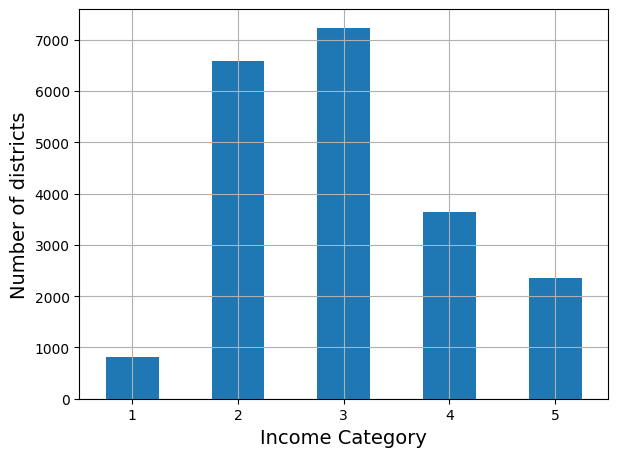

In [22]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")
plt.show()

In [23]:
# Stratified sampling based on income category.
#sklearn.model_selection has number of splitter classes.
#split() yields the training and test indices, not the data itself.
#below code generates 10 different stratified splits of the same dataset, basically creates 10 different sample sets.

from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
strat_splits=[]

for train_index,test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n=housing.iloc[train_index]
  strat_test_set_n=housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

print(strat_splits)

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  med

In [24]:
#for now, using the first split

strat_train_set,strat_test_set=strat_splits[0]


In [25]:
#sorter way to get a single split for stratified sampling
from sklearn.model_selection import train_test_split

strat_train_set,strat_test_set=train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)


In [26]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [27]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() /len(data)

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

compare_props=pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),

}).sort_index()

compare_props.index.name="Income Category"
compare_props["Strat. Error %"]=(compare_props["Stratified %"]/ compare_props["Overall %"]-1)
compare_props["Rand. Error %"]=(compare_props["Random %"]/compare_props["Overall %"]-1)
(compare_props * 100). round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [28]:
#As income_cat column is not going to be used again, dropping the same.

for set_ in (strat_train_set , strat_test_set):
  set_.drop("income_cat",axis=1, inplace=True)

### Explore and Visualize the data to gain insights

In [29]:
housing=strat_train_set.copy()

## Visualize Geographical Data

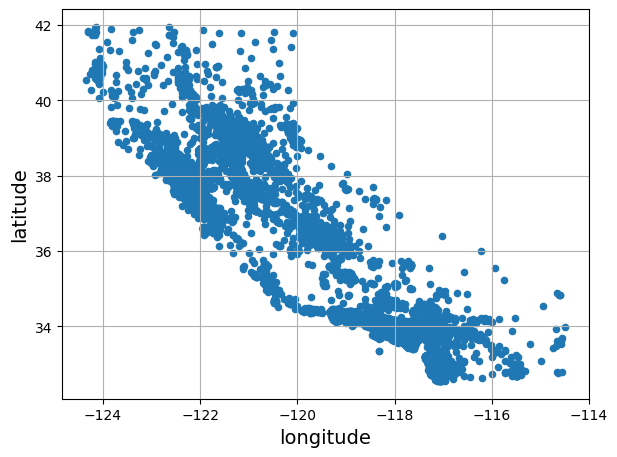

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()

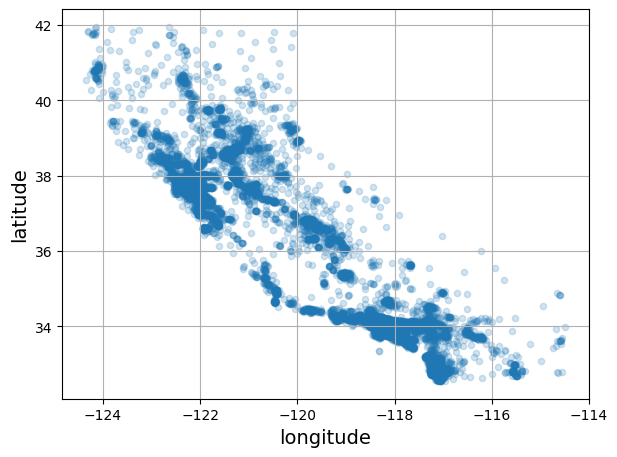

In [31]:
# setting the alpha value to visualize the place where there is a high density of data points

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")
plt.show()

In [ ]:
#next look at the housing price, the radius of each circle represents the district's population(option s), and the color represents the price(option c)
#Use a predefined color map (option cmap) called jet, which range from blue (low value) to red (high value)

housing.plot(kind="scatter",x="longitude",y="latitude", grid=True, s=housing["population"]/100, label="population", c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
save_fig("housing_prices_scatterplot")
plt.show()

#The argument Sharex=False fixes a display bug: without it, the x-axis values and label are not displayed.


The next cell generates the first figure in the chapter, it just beautified version of the previous figure , with an image of California added in the background, nicer label name and no grid.

In [ ]:
#download the California image
filename="california.png"

if not (IMAGE_PATH / filename).is_file():
  homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
  url=homl3_root + "images/end_to_end_project/"+filename
  print("Downloading", filename)
  urllib.request.urlretrieve(url,IMAGE_PATH/filename)

housing_renamed=housing.rename(columns={
    "latitude" :"Latitude","longitude":"Longitude",
    "population":"Population",
    "median_house_value":"Median house value (usd)"
})

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", s=housing_renamed["Population"] /100, label="Population",c="Median house value (usd)", cmap="jet",colorbar=True,legend=True,sharex=False, figsize=(10,7))
california_img=plt.imread(IMAGE_PATH  / filename)
axis=-124.55, -113.95, 32.45, 42.05

plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

### Look for Correlation

In [ ]:
#as dataset is not large the computing the standard correlation coefficient between every pair of attributes using the corr() method.
corr_matrix= housing.corr(numeric_only=True)

In [ ]:
corr_matrix.info()

The correlation coefficient range from -1 to 1. When it is close to 1, it means that there is a strong positive correlation.When a coefficient is close to -1, it means that there is a strong negative correlation.Finally coefficient close to 0 mean that there is no linear correlation.

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

Check correlation between attributes is to use the Pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. since there are now 11 numerical attributes, that will have 11^2 =121 plots, so we need to decide few promising attributes that seem most correlated with the median housing value.



In [ ]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, to check zoom in

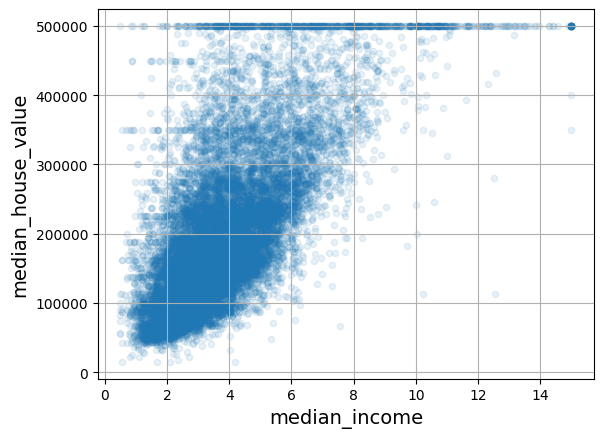

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1, grid=True)
plt.show()

Experiment with Attribute combinations
- attributes have a skewed-right distribution, so that needs to be transform (by computing logarithm or square root).

- one last thing to try out various attribute combinations before data preparation.

- Example: total number of rooms in a district doesn't make sense, however total rooms per household might be useful.

- Example: population per household also seems like an interesting attribute combination to look at.

In [ ]:
housing["rooms_per_house"]=housing["total_rooms"]/housing['households']
housing['bedrooms_ratio']=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithm

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()


# Clean the Data
####handle missing values
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the missing values to some value(zero, the mean, the median, etc.), this is called imputation.




In [42]:
#housing.dropna(subset=["total_bedrooms"], inplace=True) #option 1
#housing.drop("total_bedrooms", asix=1) #option 2
#median=housing["total_bedrooms"].median() #option 3 -- it looks like least destructive,, but instead of the preceding code, will use a handly Scikit-Learn class
#SimpleImputer, the benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set and any new data fed to the model.

#housing["total_bedrooms"].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")

#median can only be omputed on numerial attributes, need to create a copy of the data with only the numerial attributes (this will exclude the text attribute  ocean_proximity):

housing_num=housing.select_dtypes(include=[np.number])

#now fit the imputer
imputer.fit(housing_num)

#the imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.
#Only the total_bedroom attribute had missing values, but it is safer to apply the imputer to all the numerial attributes.

imputer.statistics_




array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [43]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

 Missing values can also be replaced with the mean value(`strategy="mean"`), or with the most frequent value (`strategy="most_frequent"`), or with a constant value(`strategy="constant", fill_value=...`), the last 2 strategies support non-numerical data.

 other imputers also available in sklearn.impute package
 - `KNNImputer`: replaces each missing value with the mean of the k-nearest neighbours' value for the feature. The distance is based on all available features.

 - `IterativeImputer`: trains a regression model per feature to predict the missing value based on all the other features. It then train the model again on the updated data.

In [44]:
#use the trained imputer to transform the training set by replacing missing values with the learned medians.

X=imputer.transform(housing_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

Scikit-learn design

1. consistency

  - Estimators: to estimate some  parameters based on dataset.

  - Transformers: transform a dataset, relies on leared parameters, like imputer to fix missing value by using different strategies

  - Predictors: like LinearRegression model, also has a score() to measure the quality of the predictions.

2. Inspection

  All the estimator's hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy) and all the etimator's learned parameters are accessible via public instane variables with an underscore suffix (e.g., imputer.statistics_)

3. Nonproliferation of classes

  Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

4. Composition

  Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by final estimator.

5. Sensible defaults
  
  Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly creates a baseline working system.

In [45]:
# Recover columns name back from X (NumPy array)

housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


## Handling Test and Categorical Attributes

In [46]:
housing_cat=housing[["ocean_proximity"]]

housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [47]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [48]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [49]:
#can get the list of categories using the categories_ , this is a list containing a 1D array of categories for each categorical attribute

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

using ordinal_encoder doesn't fit to given data as it works well when deal with ordered data like "Bad","Average","Good", "Excelent", so can use order 0-4 , however for ocean_proximity it doesn't fit, so can use One_Hot_Encoder that will create n number of binary columns for n different value for a single column.

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()

housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

#housing_cat_1hot is a sparse matrix having large values are 0 and 1 for each row , so internally only value 1 is stored in memory with position.

#to convert it back to Dense Numpy array , just need to call toarray()

#alternatively can set sparse=False when creating the oneHotencoder, in which case the transform() will return a regular (dense) NumPy Array.




<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Alternatively can set sparse_output=False when creating the OneHotEncoder (note: The sparse hyperparameter was renamed to sparse_output in Scikit-Learn 1.2)

In [51]:
cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [53]:
# one hot encoding can be done using pandas as well.

df_test=pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [54]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [55]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [56]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [57]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [58]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [59]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown),columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)



Transformers also provide a get_feature_names_out() method that you can use to build a DataFrame around the transformer's output:

In [60]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# **Feature Scaling and Transformation**
This is required to bring all numerical columns value on same scale , this is required as number of rooms range from 6 to 39320, while the median income range is 0 to 15. Without any scaling, most models will be biased towards ignoring the median income and focusing more on the number of rooms.

Two common ways to get all attributes to have same scale.
 - min-max scaling (also knows as normalization)

    for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1.This is performed by subtracting the min value and dividing by the difference between the min and the max.

    Scikit-Learn provides a transformer called `MinMaxScaler`. It has a `feature_range` hyperparameter that lets allow changing the range if, for some reason , 0-1 range not needed.

    Neural Networks works best with zero-mean inputs, so a range of -1 to 1 is preferable.



NOTE: As with all estimators, it is important to fit the scalers to the training data only, NEVER use fit() or fit_transform() for anything else than training set.

 Once trained scaler created , later can then use it to transform() any other set, including the validation set, the test set and new data.

 NOTE: While the training set values will always be scaled to the specific range, if new data contains outliers, these may end up scaled outside the range.to avoid the same just set clip hyperparameter to True.

In [61]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler= MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

 - standardization scaling

    first it subtract the mean value (so standardized values have zero mean), than it divides the result by the standard deviation(so standardized values have a standard deviation equal to 1).
    **Standardization doesn't restrict values to a specific range**.However Standardization much less effected by outliers.

    example: suppose a district has a median income equal to 100 (by mistake) , instead of the usual 0-15. Min-max scaling to the 0-1 range would map this outlier down to 1 and it would crush all the other values down to 0-0.15, whereas standardization would not be much affected.
    Scikit-Learn provides transformer called `StandardScaler`

In [62]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

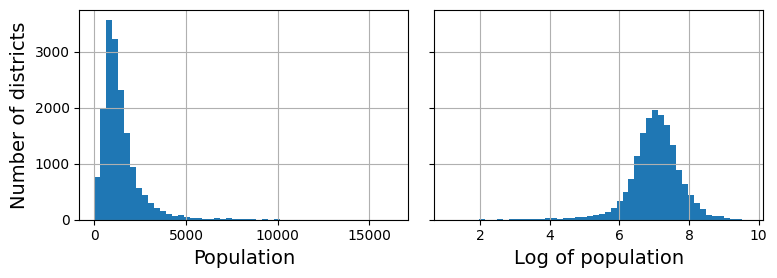

In [63]:
fig,axs=plt.subplots(1,2,figsize=(8,3), sharey=True)
housing['population'].hist(ax=axs[0], bins=50)
housing['population'].apply(np.log).hist(ax=axs[1], bins=50)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

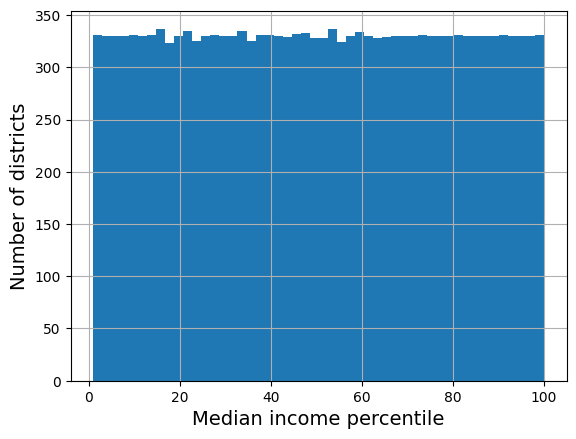

In [64]:
percentiles=[np.percentile(housing["median_income"], p) for p in range(1,100)]

flattened_median_income=pd.cut(housing["median_income"], bins=[-np.inf]+percentiles+[np.inf],labels=range(1,100+1))

flattened_median_income.hist(bins=50)

plt.xlabel("Median income percentile")

plt.ylabel("Number of districts")

plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

Feature with heavy tail to the right is to replace the feature with its square root (or raise the feature to a power between 0 and 1).

When a feature has a really long and heavy tail , such as power law distribution , then replacing the feature with its logarithm may help.

Radial Basis Function (RBF)= any function that depends only on the distance between input value and a fixed point. The most commonly used RBF is the Gaussian RBF, whose output value decays eponentially as the input value moves away from the fixed point.

For example, the Gaussian RBF similarity between the housing age x and 35 is given by the equation `exp(–γ(x – 35)²)`. The hyperparameter γ (gamma) determines how quickly the similarity measure decays as x moves away from 35. Using Scikit-Learn’s rbf_kernel() function,

In [65]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35=rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

In [66]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

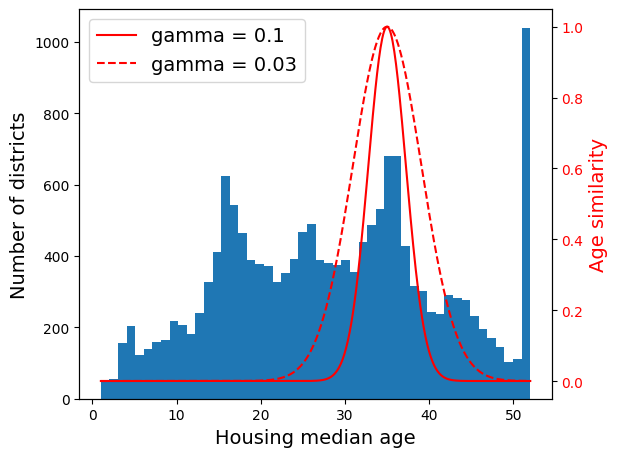

In [67]:
ages=np.linspace(housing["housing_median_age"].min(), housing["housing_median_age"].max(),500).reshape(-1,1)

gamma1=0.1
gamma2=0.03
rbf1=rbf_kernel(ages,[[35]], gamma=gamma1)
rbf2=rbf_kernel(ages,[[35]], gamma=gamma2)

fig, ax1= plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2=ax1.twinx() #create a twin axis that shares the same x-axis

color='red'
ax2.plot(ages,rbf1, color=color, label="gamma = 0.1")
ax2.plot(ages,rbf2, color=color, label="gamma = 0.03", linestyle="--")

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

Transformation may also needed for target attribute .

Example: If target distribution has heavy tail , then choosing logarithm should be good option , however doing this, the model will now predict the log of the median house value, not the median house value itself, so to predict model for median house value , computing the exponential of model required.

for this inverse compute, there is a function `inverse_transform()` in scikit-learn.



In [68]:
housing[["median_income"]].iloc[:5]

,median_income
13096,2.0987
14973,6.0876
3785,2.4330
14689,2.2618
20507,3.5292


In [69]:
#in below code using single raw input feature (median income) for simlicity.

from sklearn.linear_model import LinearRegression

target_scaler= StandardScaler()

scaled_labels=target_scaler.fit_transform(housing_labels.to_frame())

model=LinearRegression()

model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5] #pretend this is new data.

scaled_predictions=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_predictions)

for above simpler option is to use a `TransformedTargetRegressor`.

In [70]:
from sklearn.compose import TransformedTargetRegressor

model=TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions=model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

Custom Transformation

For transformation that doesn't require any training, can just write a function that transform the data.

In [71]:
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)

log_pop= log_transformer.transform(housing[["population"]])

Transformation can take hyperparameter as additional arguments.

In [72]:
#create a transformer that computes the same Gaussian RBF similarity measure as earlier:

#with single feature
rbf_transformer= FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[["housing_median_age"]])


In [73]:
#with multiple features
sf_coords=37.7749, -122.41

sf_transformer= FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords],gamma=0.1))

sf_simil=sf_transformer.transform(housing[["latitude","longitude"]])

Custom Transformations are also useful to combine features.For example , `FunctionTransformer` that computes the ratio between the input features 0 and 1:



In [74]:
ratio_transformer=FunctionTransformer(lambda X: X[:,[0]]/X[:,[1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True): #no *args or ** kwargs!
    self.with_mean=with_mean

  def fit(self,X,y=None): # y is required even though we don't use it
    X=check_array(X) #Checks that X is an array with finite float value
    self.mean_ = X.mean(axis=0)
    self.scale_=X.std(axis=0)
    self.n_features_in_= X.shape[1] #every estimator stores this in fit(), features...
    return self #always return self!

  def transform(self,X):
    check_is_fitted(self) #looks for learned attributes (with trailing _)
    X= check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X= - self.mean_
    return X/ self.scale_

A custom transformer can use other estimators in its implementation. Example: below code demonstrate custom transformer that uses `KMeans` clusterer in the fit() method to identify the main clusters in the training data, and then uses `rbf_kernel()` in the `transform()` method to measure how similar each sample is to each cluster center.

In [76]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
    self.n_clusters= n_clusters
    self.gamma=gamma
    self.random_state=random_state

  def fit(self, X,y=None, sample_weight=None):
    self.kmeans_= KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X,sample_weight=sample_weight)
    return self # always return self!

  def transform(self,X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self,names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [77]:
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1,random_state=42)

similarities=cluster_simil.fit_transform(housing[["latitude","longitude"]], sample_weight=housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This code creates a ClusterSimilarity transformer, setting the number of clusters to 10. Then it calls `fit_transform()` with the latitude and longitude of every district in the training set, weighting each district by its median house value. The transformer uses k-means to locate the clusters, then measures the Gaussian RBF similarity between each district and all 10 cluster centers. The result is a matrix with one row per district, and one column per cluster.

In [78]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

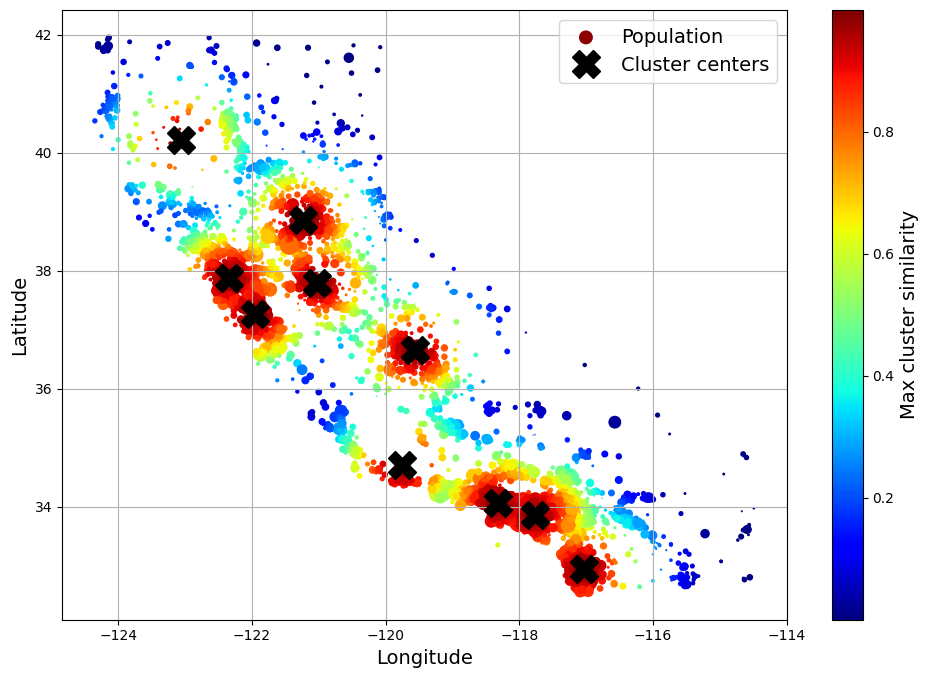

In [79]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

### Transformation Pipelines

There are many data transformation steps and to execute all of these transformation in sequence, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformation.



Pipeline constructor takes a list of name/estimator pairs(2-tuples) defining a sequence of steps.The names can be anything, as long as they are unique and doesn't Contains double underscore `__`.

when discussing hyperparameter tuning, the estimators must all be transformers (i.e., they must have a `fit_transform()`method), except for the last one, which can be anything.

In a Jupyter notebook, if you `import sklearn` and run `sklearn.​set_config(display="diagram")`, all Scikit-Learn estimators will be rendered as interactive diagrams. This is particularly useful for visualizing pipelines. To visualize num_pipeline, run a cell with num_pipeline as the last line. Clicking an estimator will show more details.

In [80]:
from sklearn.pipeline import Pipeline

#
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

To avoid passing name to transformers, can use the make_pipeline(), it takes transformers as positional arguments and creates a `Pipeline`using the names of the transformers classes

In [81]:
from sklearn.pipeline import make_pipeline

num_pipeline= make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

 If you call the pipeline’s `transform()` method, it will sequentially apply all the transformations to the data. If the last estimator were a predictor instead of a transformer, then the pipeline would have a `predict()` method rather than a `transform()` method.

In [82]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

if you want to recover a nice DataFrame, you can use the pipeline’s `get_feature_names_out()` method:

In [83]:
df_housing_num_prepared= pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

Single Transformer to handle all columns, appying the appropriate transformations to each columns.For this `ColumnTransformer` can be used.



For example, the following ColumnTransformer will apply num_pipeline (the one we just defined) to the numerical attributes and cat_pipeline to the categorical attribute

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]

cat_attribs=["ocean_proximity"]

cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing= ColumnTransformer([("num",num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs)])

Since listing all the column names is not very convenient, Scikit-Learn provides a `make_column_selector()` function that returns a selector function you can use to automatically select all the features of a given type.

 if you don’t care about naming the transformers, you can use `make_column_transformer()`, which chooses the names for you, just like `make_pipeline()` does

In [85]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing=make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

Now we can apply this `ColumnTransformer` to housing data. and that completes preprocessing pipeline that takes entire training dataset and applies each transformer to the appropriate columns, then concatenates the transformed columns horiontally (transformers must never change the number of rows).Once again this returns a Numpy array but can get column names using `preprocessing.get_feature_names_out()` and wrap the data in nice DataFrame as we did before.

In [86]:
housing_prepared=preprocessing.fit_transform(housing)

The OneHotEncoder returns a sparse matrix and the num_pipeline returns a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense matrix.

Now we need to create a single pipeline that will perform all the transformations experimented with up to now.

Below are the reason why do we need pipleline and how does it work?

//Missing Value handling
1. Missing values in numerical features will be imputed by replacing them with the median. In categorical feature will be replaced with most frequent category.

// Categorical feature value handling
2. The categorical feature will be one hot encoded, as most ML algorithms only accept numerical input.

// To find better correlated values with target add some more columns by computing value with 2 or more different available features.

3. A few ratio features will be computed and added : bedrooms_ratio, room_per_house, and people_per_house. hopefully these will be better correlated with the median house value, and thereby help the ML models.


//In place of using address or longitude or latitude feature , cluster can help to add new feature will make more sense..

4. A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.

//Gaussian distributed data set always preferable to train a model and that can be achieved by replacing the actual data by Logarithm.

5. Features with a long tail will be replaced by their logaritm, as most models prefer features with roughly uniform or Gaussian distributions.


//to fix the range of data between a same range like 0 to 1 or -1 to 1 helps to set common scale for all features and that helps to create a unbiased model.

6. All numerical features will be standardize , as most ML algoritms prefer when all features have roughly the same scale.

The code to build the pipeline to do all above :

In [87]:
def column_ratio(X):
  return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"] #feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil= ClusterSimilarity(n_clusters=15,gamma=1., random_state=42) #based on gridsearchCV updated n_clusers from 10 to 15

default_num_pipeline=make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)


preprocessing= ColumnTransformer([
    ("bedrooms", ratio_pipeline(),["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(),["total_rooms", "households"]),
    ("people_per_house",ratio_pipeline(),["population","households"]),
    ("log", log_pipeline,["total_bedrooms","total_rooms","population","households","median_income"]),
    ("geo", cluster_simil,["latitude","longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
],

    remainder=default_num_pipeline #one column remaining"housing_median_age
                                 )

The above `ColumnTranformer` perform all the transformations and outputs a NumPy array with 24 features:

In [88]:
#Data preprocessing applied to complete Dataset.

housing_prepared=preprocessing.fit_transform(housing)

housing_prepared.shape

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 29)

In [89]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'geo__Cluster 10 similarity',
       'geo__Cluster 11 similarity', 'geo__Cluster 12 similarity',
       'geo__Cluster 13 similarity', 'geo__Cluster 14 similarity',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

## Select and Train a Model

**Train and Evaluate on the Training Set**

## `LinearRegresion`

In [90]:
#train a basic linear regression model

from sklearn.linear_model import LinearRegression

lin_reg= make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a3...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a3e79bc7d90>)])),
                ('linearregression', LinearRegression())])

In [91]:
#first trying with training set.
housing_predictions= lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = rounded to the nearest 100


array([244500., 376800., 127800., 101700., 323200.])

In [92]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

prediction and actual has huge difference in above two code block

To check the performance can use RMSE on whole training set using Scikit-Learn's `mean_squared_error()`

In [93]:
from sklearn.metrics import mean_squared_error

lin_rmse= mean_squared_error(housing_labels, housing_predictions, squared=False)

lin_rmse

68226.58718990255

the `median_housing_values` of most districts range between $120000 , $265000.

So a typical prediction error of 68628 is really not very satisfying. This is a example of model `underfitting` the training data. when this happen it means features do not provide enough information to make good predictions or that the model is not powerful enough.



In [94]:
#model evalution using cross validation for linear regression model.

from sklearn.model_selection import cross_val_score

lin_rmses=-cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [95]:
pd.Series(lin_rmses).describe()

count       10.000000
mean     69350.027762
std       3947.454947
min      65207.687081
25%      67647.064295
50%      68104.069480
75%      69489.298676
max      79784.810991
dtype: float64

## `DecisionTreeRegressor`

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

tree_reg.fit(housing,housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a3...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a3e79bc7d90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Model evaluation

In [97]:
housing_predections=tree_reg.predict(housing)

tree_rmse=mean_squared_error(housing_labels, housing_predictions, squared=False)

tree_rmse

68226.58718990255

Validate DecisionTree using Cross-Validation

split the training set further into smaller training and validation set, then train model against the smaller training set and evaluate them against the validation set.

A great alternative is to use Sciket-Learn's k_-fold cross-validation feature.
the following code randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluate the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training.

The result is an array containing the 10 evaluation scores:

In [98]:
from sklearn.model_selection import cross_val_score

tree_rmses= -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error",cv=10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.

In [99]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66235.915847
std       2304.448655
min      63006.172683
25%      64411.767723
50%      65850.954423
75%      68000.242879
max      69932.157202
dtype: float64

for decision tree std is 2060 as compare with linear regression where std is 4182.205077, and RMSE for decision tree is 66868 as compare with Linear regression where RMSE is 69858, so decision tree is slightly better then Linear regression but not overall good. This detail is possible because of cross validation , here 10 CV has been used.

## `RandomForestRegressor`

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=make_pipeline(preprocessing, RandomForestRegressor(random_state=42 ,max_features=6))

forest_rmses=-cross_val_score(forest_reg, housing, housing_labels,scoring="neg_root_mean_squared_error",cv=10)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [101]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     43043.362190
std       1119.924727
min      40825.902775
25%      42459.562361
50%      43149.388533
75%      43611.578250
max      44791.709209
dtype: float64

In [102]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


## Note: Below two code block is to train a model for all given training set , and ignore using cross validation , that might result with overfitting.


- To fix overfitting , possible solutions are to simplify the model , constrain it(i.e. regularize it), or get a more training data, before diving much deeper into random forest, however trying different other models from various categories of machine learning algorithms(e.g. several support vector machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters, the goal is to shotlist a few (2 to 5 ) promising model.

In [103]:
from sklearn.metrics import mean_squared_error
forest_reg=make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_reg.fit(housing,housing_labels)
housing_prediction_RandForestReg=forest_reg.predict(housing)
Rand_forest_tree_rmse=mean_squared_error(housing_labels, housing_prediction_RandForestReg, squared=False)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
pd.Series(Rand_forest_tree_rmse).describe()

count        1.00000
mean     17333.42173
std              NaN
min      17333.42173
25%      17333.42173
50%      17333.42173
75%      17333.42173
max      17333.42173
dtype: float64

### Fine-Tune Model

After selecting promising model, fine-tune the model is needed.

Grid Search

1. fiddle with the hyperparameters manually until find a great combination of hyperparameter values. - very tedious work , however can use Scikit-Learn ` GridSearchCV` class to search for hyperparameters. GridSearchCV needs input of hyperparameters the one needed to experiment with and what values to try out, it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

Example: below code searches for the best combination of hyperparameter values for the ` RandomForestRegressor`

In Below code, parameters defined with __ (double underscore) will be split and considered as two separate parameters , example preprocessing__geo__n_clusters will be preprocessing ,geo and n_clusters.

preprocessing is the estimator name in the pipeline and finds the preprocessing `ColumnTransformer` .

Next, it look for transformer named `geo` inside `ColumnTransformer` and finds the `ClusterSimilarity` transformer (used for longitude and latitude attributes).

Next, it finds the transformer's `n_clusters` hyperparameters.

same for, `random_forest__max_features` refers to the max_features hyperprameter of the estimator named `random_forest` which is RandomForest model.

In [105]:
from sklearn.model_selection import GridSearchCV

full_pipeline=Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=42)),

])

param_grid=[
    {
        'preprocessing__geo__n_clusters':[5,8,10],
        'random_forest__max_features':[4,6,8]
    },
    {
        'preprocessing__geo__n_clusters':[10,15],
        'random_forest__max_features':[6,8,10]
    },
]

grid_search=GridSearchCV(full_pipeline, param_grid,cv=3, scoring="neg_root_mean_squared_error")

grid_search.fit(housing,housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a3e79bc7d90>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

There are two dictionaries in the param_grid, so GridSearchCV will first evaluate all 3 X 3 = 9 combinations of `n_clusters` and `max_features` hyperparameter values specified in the first `dict`, then it will try all 2 X 3 = 6 combinations of hyperparameter value in the second `dict`. o total the grid search will explore 9 +6 =15 combinations of hyperparameter values, and it will train the pipeline 3 times per combination, since we are using 3-fold cross validation. This means there will be grand total of 15 X 3 = 45 rounds of training!

In [106]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

the evluation scores are available using grid_search.cv_results_

In [107]:
cv_res=pd.DataFrame(grid_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
[...] #change column names to fit on this page, and show rmse = -score
cv_res.head() #note: the 1st column is the row ID

#rank_test_score column shows best fit where mean_test_score is 44042

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.399681,0.122631,0.159848,0.001539,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
13,7.608850,0.353509,0.158226,0.001242,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,2
14,9.313924,0.211623,0.158120,0.000241,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44374.325167,-44285.549219,-45316.375999,-44658.750128,466.421934,3
7,6.140344,0.114818,0.157280,0.000953,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
9,6.474784,0.479182,0.155761,0.000696,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4


## **Randomized Search**

Grid Search is fine when exploring relatively few combination , however `RandomizedSearchCV` is often preferable, especially when the hyperparameter search space is large. This class can be used in much the same way as the `GridSearchCV` class , but instead of trying out ll possible combinations it evaluates a fixed number of combinations, selecting a random value for each hyperparameter at every iteration.

benefits:

1. With Randomized Search it helps to get 1000 different values for each of these hyperparameters for 1000 iterations in **Randomized Search** whereas GridSearch would have only explore few values listed for each one.

2. In case hyperparameter doesn't actually make any difference, and when I do not aware of it.and if it has 10 possible values and when added for GridSearch then training will take 10 times longer. but if added it to a random search, it will not make any differences.

3. If there are 6 hyperparameters to explore, each with 10 possible values, then grid search offers no other choice and model will train multiple times, wheareas random search can always run for any number o iterations what I choose.

NOTE: For each hyperparameter, i need to provide either a list of possible values , or a probability distribution.



In [108]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint
param_distribs={
    'preprocessing__geo__n_clusters':randint(low=3, high=50),
    'random_forest__max_features':randint(low=2, high=20)
}

rnd_search=RandomizedSearchCV(
    full_pipeline,param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(housing,housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3e79e57340>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3e79e56e30>},
                   random_state=42, scoring='neg_root_mean_squared_error')

Scikit-Learn also has `HalvingRandomSearchCV` and `HalvingGridSearchCV` hyperparameter search classes. it is used to utilize computational resources more efficiently, either to train faster or to explore a large hyperparameter space.

how it works?

1. Many hyperparameters called "candidates" are generated using gridsearch or random approach.

2. These candidates are then used to train a model that are evaluated using cross-validation.

3. because of  `HalvingRandomSearchCV` and `HalvingGridSearchCV` training uses limited resources, which speed up this first round considerably.

NOTE: "limited resources" means models are trained on a small part of the training set.

4. Once every candidate has been evaluated, only the best one go to the second round, where they are allowed more resources to compete.

5. after several rounds, the final candidates are evaluated using full resources.

6. this will save some time tuning hyperparameters.


## **Ensemble Methods**

Another way to fine-tune your system is to try to combine the models that perform best.

## **Analyzing the Best Models and their Errors**



In [109]:
final_model=rnd_search.best_estimator_ #includes preprocessing

feature_importances= final_model["random_forest"].feature_importances_
feature_importances.round(2)


array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

Sort these importance scores in descending order and display them next to their corresponding attribute names:


This information helps to drop some of the less useful features(e.g., `ocean_proximity` category is really useful, so can try dropping others)

`sklearn.feature_selection.SelectFromModel` transformer can automatically drop the least useful features, when fit it, it trains a model(typically a random forest), looks at its `feature_importances_` atttribute, and selects the most useful features, and after calling `transform()`, it drops the other features.

In [110]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.01348963625822907, 'geo__Cluster 3 similarity'),
 (0.01338319626383868, 'geo__Cluster 38 similarity'

## **Evaluate System on the Test set **

In [111]:
X_test=strat_test_set.drop("median_house_value",axis=1)

y_test= strat_test_set["median_house_value"].copy()

final_predictions=final_model.predict(X_test)

final_rmse=mean_squared_error(y_test, final_predictions,squared=False)

print(final_rmse)

41424.40026462184


if the new model is just 0.1% better then the model deployed in production then to check how preceise this estimate is . for this can compute a 95% confidence interval for the generalization error using `scipy.stats.t.interval()`, that can give fairly large interval from 39,275 to 43,467 and previously point estimate of 41,424 is roughly in the middle of it..

In [112]:
from scipy import stats

confidence=0.95

squared_errors=(final_predictions - y_test) **2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors))
                         )

array([39275.40861216, 43467.27680583])

## **Launch Monitor and Maintain Your System**

to save the model use library `joblib` .

Save the model
Save the cross-validation scores and actual predictions on the validation set.

This will allow to easily compare scores across model types, and compare the types of errors they make.

Once model transferred to production, load the model and use , before that import any custom classes and functions the model relies on, then load the model using `joblib` and use it

In [113]:
#save the model
import joblib

joblib.dump(final_model,"my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [114]:
#load the model

# import joblib
# [...] #import KMeans, BaseEstimator, TransformerMixin, rbf_kernel, etc.

# def column_ratio(X):[...]

# def ratio_name(function_transformer, feature_names_in):[...]

# class ClusterSimilarity(BaseEstimator, TransformerMixin):[...]

# final_model_reloaded=joblib.load("my_california_housing_model.pkl")

# new_data=[...]

# predictions=final_model_reloaded.predict(new_data) 